# Room Occupancy Detection

The aim of this project is to predict whether a room is occupied or not based on the data collected from the sensors. The data set is collected from the UCI Machine Learning Repository. The data set contains 7 attributes. The attributes are date, temperature, humidity, light, CO2, humidity ratio and occupancy. The data set is divided into 3 data sets for training and testing. The data set provides experimental data used for binary classification (room occupancy of an office room) from Temperature, Humidity, Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

##### Data Dictionary





| Column   Position 	| Atrribute Name 	| Definition                                                                                           	| Data Type    	| Example                                        	| % Null Ratios 	|
|-------------------|----------------|---------------------------------------|--------------|------------------------------------------------|---------------|
| 1                 	| Date           	| Date & time in year-month-day hour:minute:second format                                              	| Qualitative  	| 2/4/2015 17:57, 2/4/2015 17:55, 2/4/2015 18:06		 	| 0             	|
| 2                 	| Temperature    	| Temperature in degree Celcius                                                                        	| Quantitative 	| 23.150, 23.075, 22.890                         	| 0             	|
| 3                 	| Humidity       	| Relative humidity in percentage                                                                      	| Quantitative 	| 27.272000, 27.200000, 27.390000                	| 0             	|
| 4                 	| Light          	| Illuminance measurement in unit Lux                                                                  	| Quantitative 	| 426.0, 419.0, 0.0	                              	| 0             	|
| 5                 	| CO2            	| CO2 in parts per million (ppm)                                                                       	| Quantitative 	| 489.666667,   495.500000, 534.500000           	| 0             	|
| 6                 	| HumidityRatio  	| Humadity ratio:  Derived quantity from temperature and   relative humidity, in kgwater-vapor/kg-air  	| Quantitative 	| 0.004986, 0.005088, 0.005203                   	| 0             	|
| 7                 	| Occupancy      	| Occupied or not: 1 for occupied and 0 for not occupied                                               	| Quantitative 	| 1, 0                                           	| 0             	|


In [53]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading two datasets and combining them into one dataset

In [54]:
#loading the datasets
df1 = pd.read_csv('datatest.csv')
df2 = pd.read_csv('datatraining.csv')

In [55]:
#combining the datasets
df = pd.concat([df1,df2])
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


## Data Preprocessing

In [56]:
#number of rows and columns
df.shape

(10808, 7)

In [57]:
#checking for null values
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [58]:
#checking for duplicate values
df.duplicated().sum()

27

In [59]:
#removing the duplicate values
df.drop_duplicates(inplace=True)

In [60]:
#checking data types
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [61]:
#converting the date and time to datetime format
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [62]:
df.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [63]:
#checking the descriptive statistics
df.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,10781,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2015-02-06 13:41:14.581207808,20.821800,25.638618,138.036704,634.460328,0.003904,0.250533
min,2015-02-02 14:19:00,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,2015-02-04 18:23:00,20.000000,21.390000,0.000000,441.000000,0.003323,0.000000
50%,2015-02-06 15:24:00,20.700000,25.680000,0.000000,464.000000,0.003805,0.000000
75%,2015-02-08 12:29:00,21.500000,28.323333,415.000000,763.000000,0.004373,1.000000
max,2015-02-10 09:33:00,24.408333,39.117500,1697.250000,2028.500000,0.006476,1.000000
std,NaN,1.078589,4.954838,212.330275,313.074686,0.000803,0.433340


In [64]:
#value counts for the target variable i.e. occupancy
df['Occupancy'].value_counts()

Occupancy
0    8080
1    2701
Name: count, dtype: int64

## Exploratory Data Analysis

In the exploratory data analysis, we will be looking at the distribution of the data, along with the time series of the data. We will also be looking at the correlation between the variables.

#### Visualizing the temperture fluctuations over time

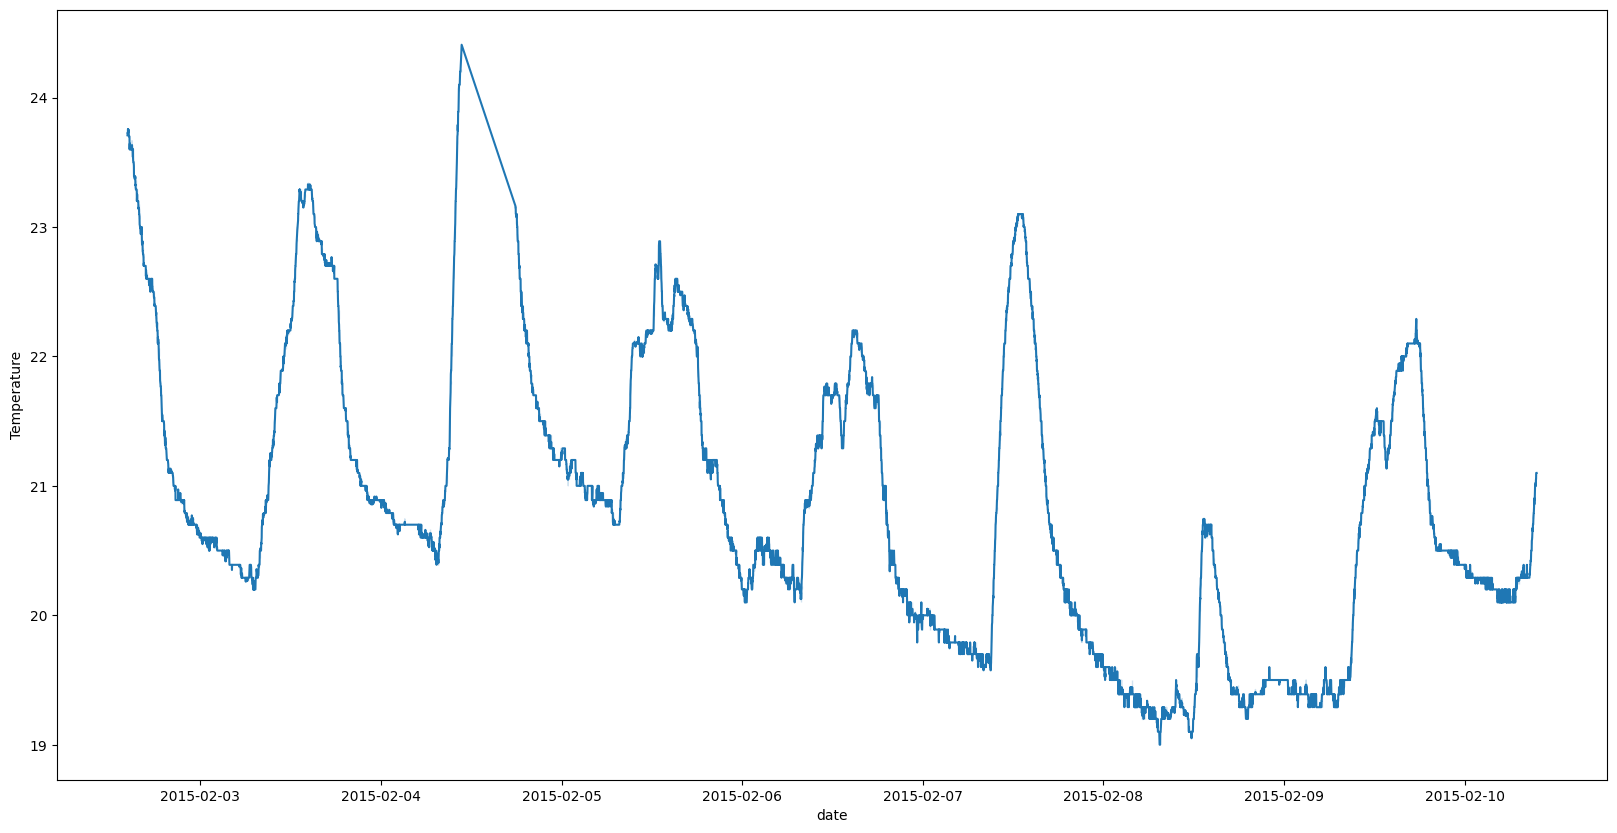

In [65]:
#lineplot for themperature changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Temperature',data=df)
plt.show()

The spikes in the graph clearly indicates that the room temperature incresases suddenly which might be due to the presence of people in the room. The temperature of the room may increase due to the heat emitted by the human body.

#### Visualizing the humidity fluctuations over time

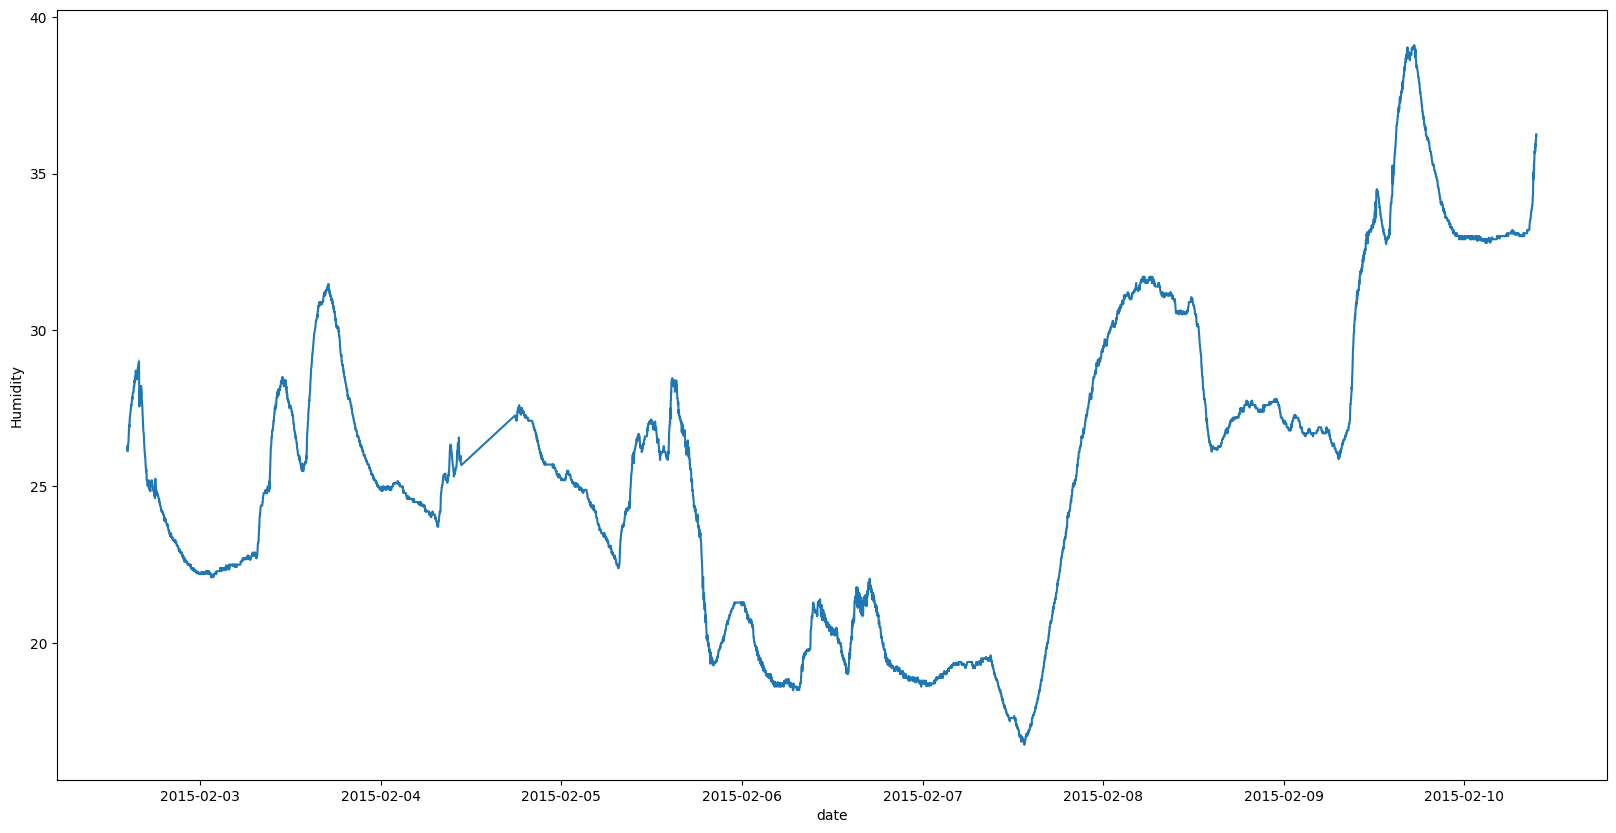

In [66]:
#lineplot for humidity changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Humidity',data=df)
plt.show()

The line graph between 3rd of February to 6th of February shows some similarity with the temperature graph, which might be due to the presence of people in the room. However 7th of February onwards there has been a significant rise in the humidity levels which might be due to cleaning of the room, or change in the weather conditions. Out of which room cleaning such sweeping the floor might be the reason for the sudden rise in the humidity levels. But it couldn't explain the increase in the humidity levels near 10th of February.

#### Visualizing the light fluctuations over time

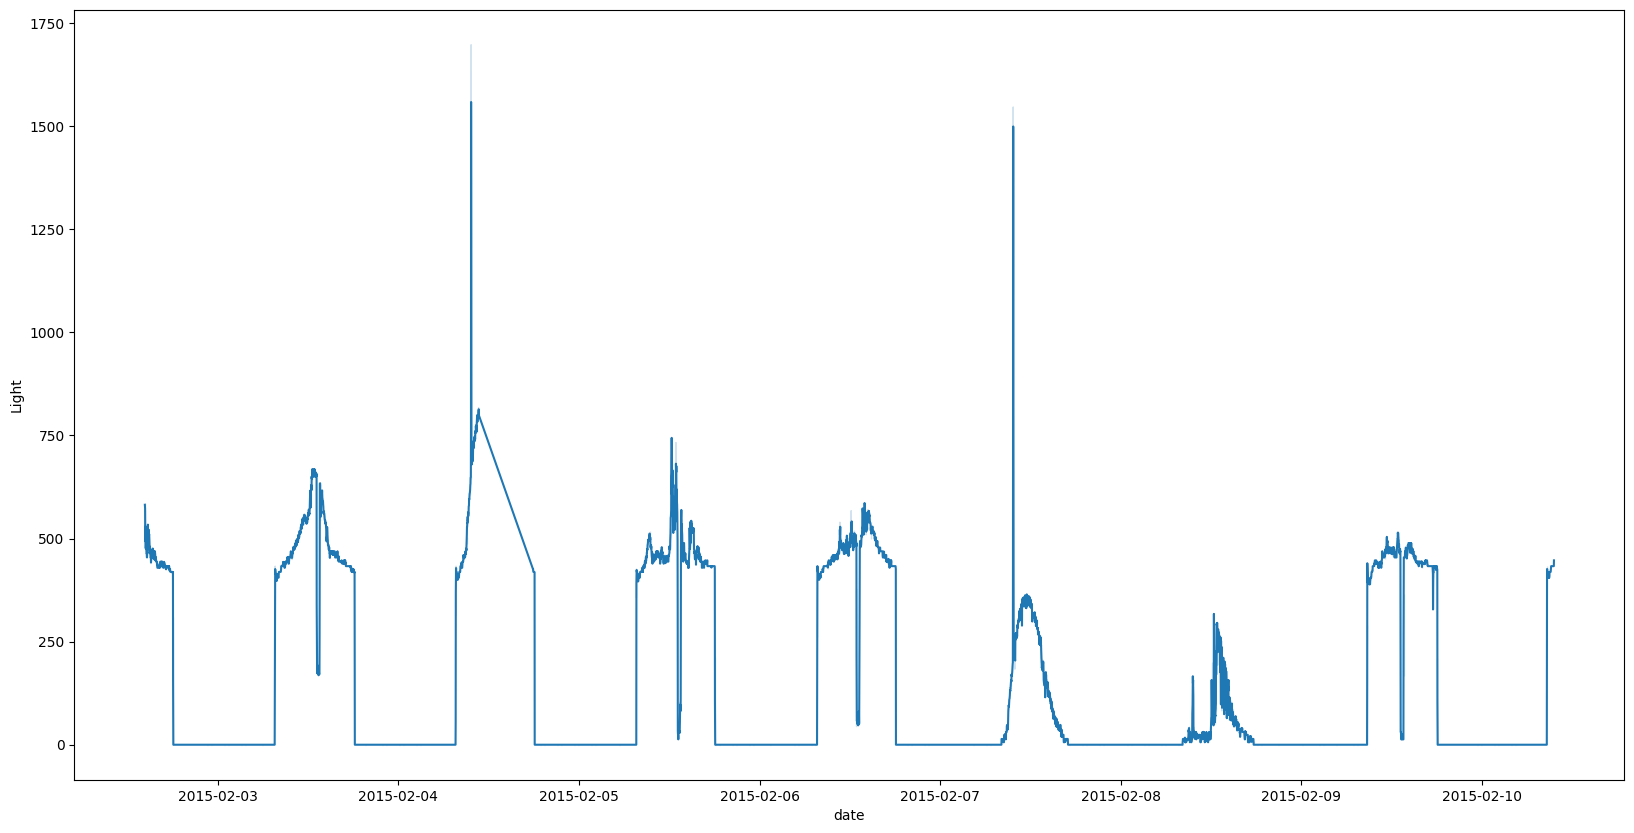

In [67]:
#lineplot for light changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='Light',data=df)
plt.show()

If we look closely, we can see that the number of peaks in this graph and in the temperature graph are same. This indicates that lights were turned on when there was a person in the room. This is a good indicator of the occupancy of the room.

##### Visualizing the CO2 fluctuations over time

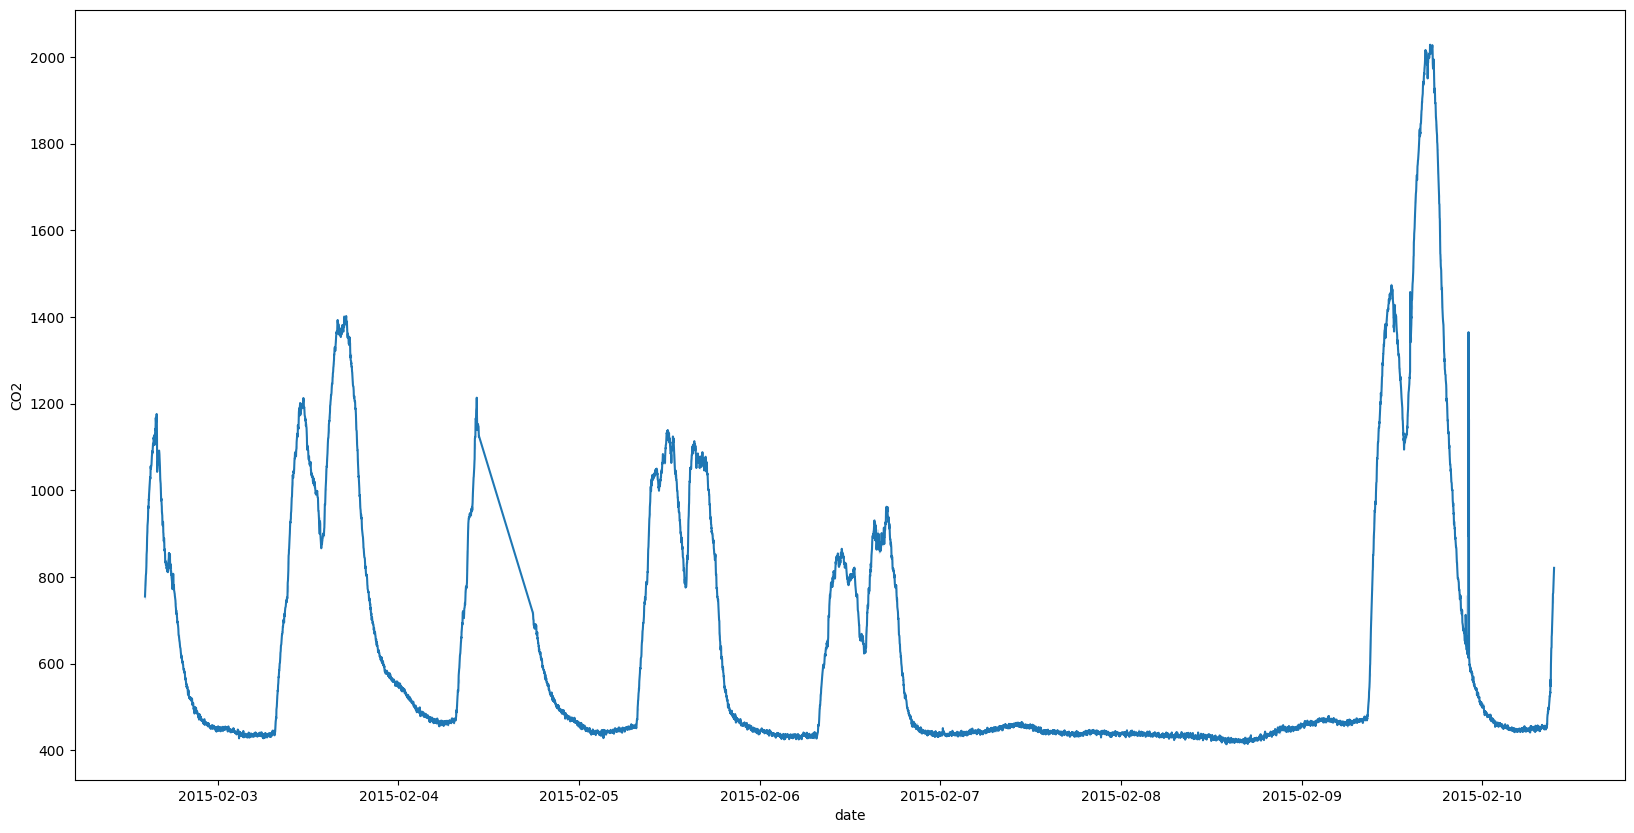

In [16]:
#lineplot for co2 changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='CO2',data=df)
plt.show()

The co2 graph also shows the spikes in the co2 levels which indicates the presence of person in the room, assuming that there is no other source of co2 in the room.In addition to that the spikes also shows correspondence with the temperature graph and light graph. However from 7th of February to 9th of February, the co2 levels where minimum, which indicstes that the room was not occupied during that time. This observation contradicts with the humidity graph and temperature graph.

#### Visualizing the humidity ratio fluctuations over time

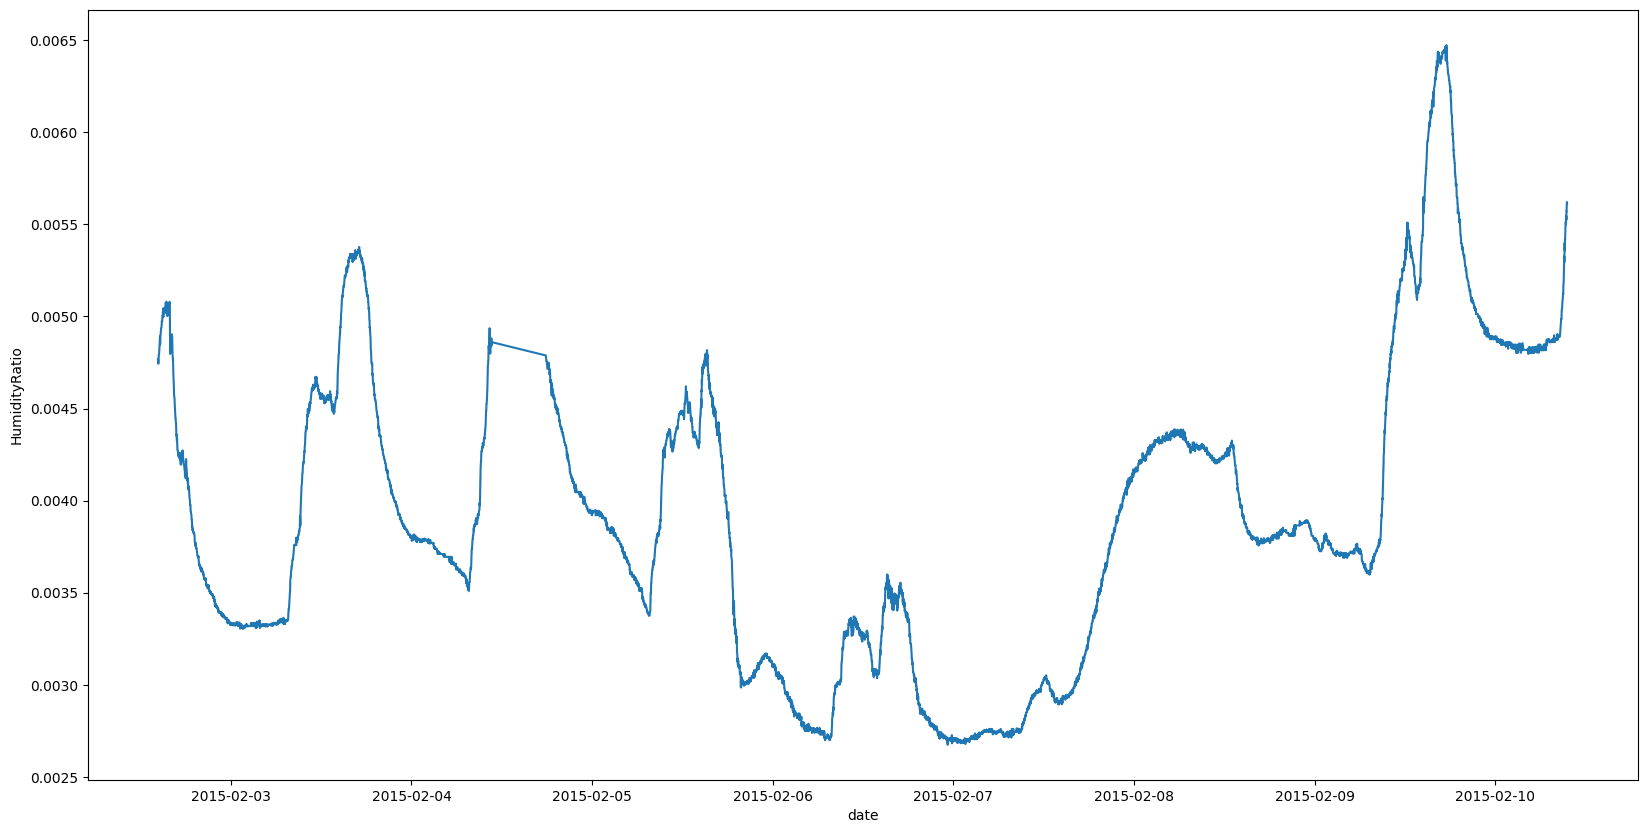

In [17]:
#lineplot for humidity ratio changes for time
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='HumidityRatio',data=df)
plt.show()

The humidity ratio graph is quite similar to the humidity graph. The spikes in the graph indicates the presence of people in the room. Moreover the same assumption is made about the humidity ratio after 9th of February.

## Correlation between the variables

### Correlation Heatmap

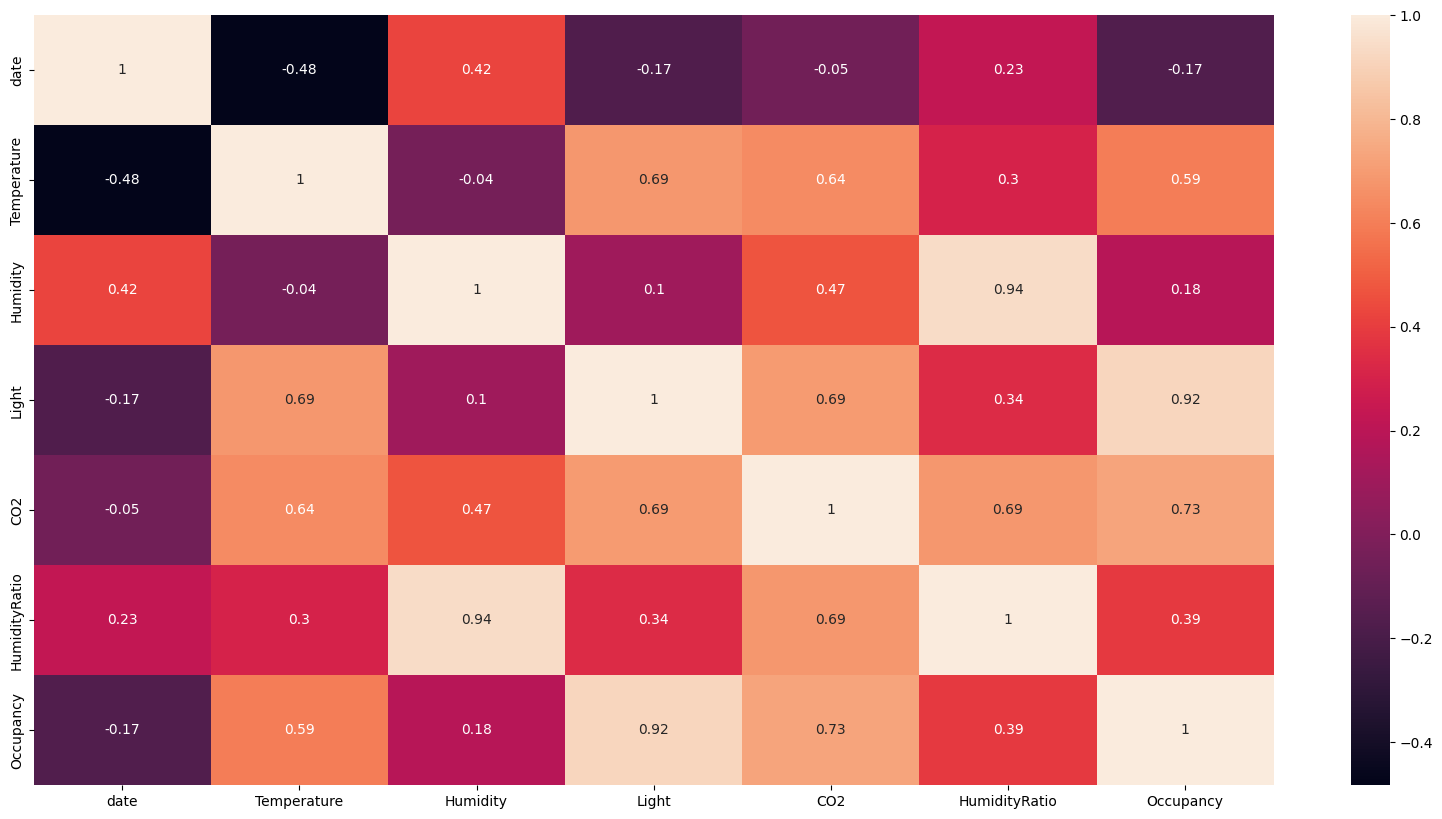

In [70]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is a strong coorelation between light and occupancy as well as between humidity and humidity ratio. The co2 levels and temperature also shows a strong correlation with the occupancy. However the humidity and humidity ratio has very less correlation with the occupancy.

#### Temperature and Occupancy

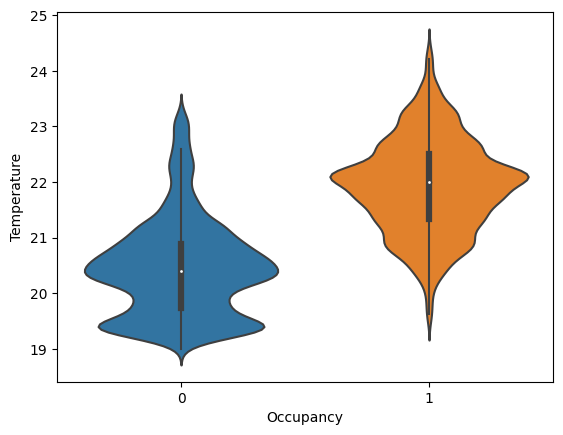

In [19]:
#violinplot for temperature
sns.violinplot(y = df['Temperature'],x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Temperature')
plt.show()

The temperature and occupancy graph shows that the temperature of the room increases when there is a person in the room. This is because of the heat emitted by the human body. The temperature of the room decreases when there is no person in the room. This proves the hypothesis regarding the peaks in the temperature graph.

#### Light and Occupancy

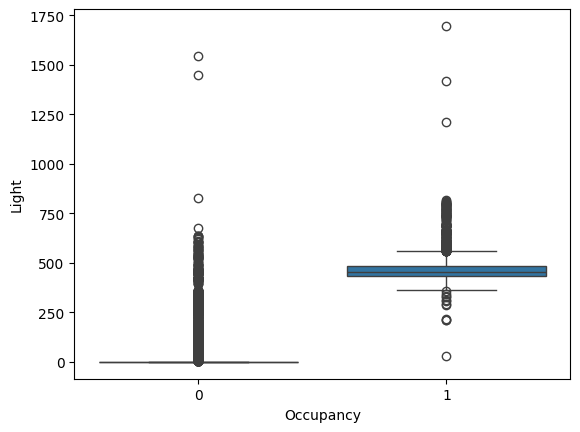

In [25]:
#boxplot for light
sns.boxplot(y = df['Light'],x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('Light')
plt.show()

The light intensity of the room increases when there is a person in the room. This is because the lights are turned on when there is a person in the room. The light intensity of the room decreases when there is no person in the room. This proves the hypothesis regarding the peaks in the light graph. The outliers in the boxplot and the curves in the ligh graph might be due to sunlight entering the room.

#### CO2 and Occupancy

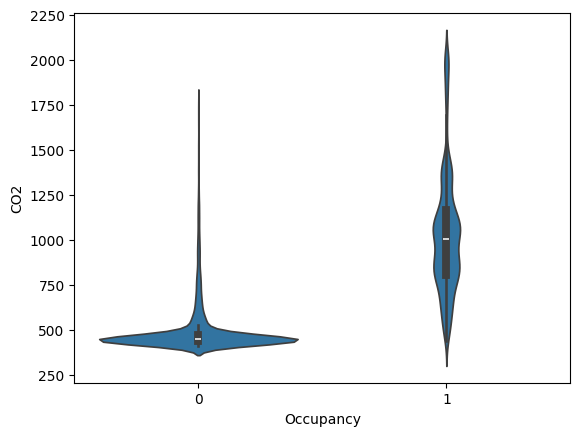

In [30]:
#violinlot for co2
sns.violinplot(y = df['CO2'],x = df['Occupancy'])
plt.xlabel('Occupancy')
plt.ylabel('CO2')
plt.show()

The CO2 levels of the room increases when there is a person in the room. This is because of the CO2 emitted by the human body. The CO2 levels of the room decreases when there is no person in the room. This proves the hypothesis regarding the peaks in the CO2 graph.

From the above EDA, it is quite clear that the temperature, light and CO2 levels of the room are a good indicator of the occupancy of the room. Therefore we will be using these three variables for our classification model.

## Data Preprocessing 2

In [31]:
#dropping columns humidity, date and humidity ratio
df.drop(['Humidity','date','HumidityRatio'],axis=1,inplace=True)

In [29]:
df.head(20)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:00,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
5,2015-02-02 14:23:00,23.7600,26.2600,568.666667,790.000000,0.004779,1
6,2015-02-02 14:25:00,23.7300,26.2900,536.333333,798.000000,0.004776,1
7,2015-02-02 14:25:00,23.7540,26.2900,509.000000,797.000000,0.004783,1
8,2015-02-02 14:26:00,23.7540,26.3500,476.000000,803.200000,0.004794,1
9,2015-02-02 14:28:00,23.7360,26.3900,510.000000,809.000000,0.004796,1


## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Occupancy'],axis=1),df['Occupancy'],test_size=0.2,random_state=42)

## Model Building

### Random Tree Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

##### Training the model

In [34]:
#training the model
rfc.fit(x_train,y_train)
#training accuracy
rfc.score(x_train,y_train)

1.0

## Model Evaluation

In [35]:
rfc_pred = rfc.predict(x_test)

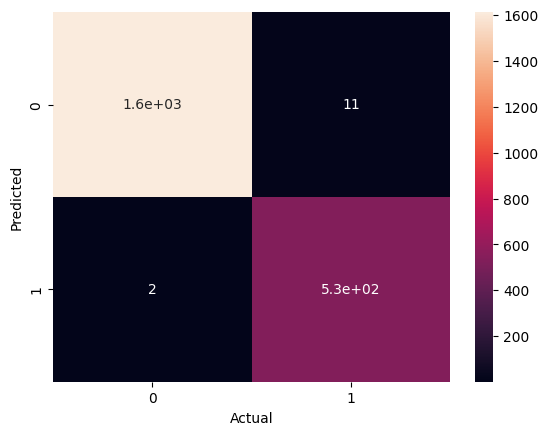

In [36]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

C:\Users\Patience\AppData\Local\Temp\ipykernel_29984\1564274427.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,label='Actual', color='r')
C:\Users\Patience\AppData\Local\Temp\ipykernel_29984\1564274427.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

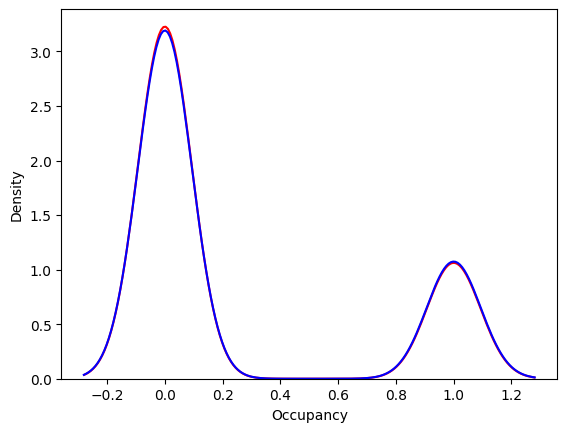

In [40]:
#distribution plot for the predicted and actual values
ax = sns.distplot(y_test,hist=False,label='Actual', color='r')
sns.distplot(rfc_pred,hist=False,label='Predicted',color='b',ax=ax)
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1623
           1       0.98      1.00      0.99       534

    accuracy                           0.99      2157
   macro avg       0.99      0.99      0.99      2157
weighted avg       0.99      0.99      0.99      2157



In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [43]:
print('Accuracy Score : ' + str(accuracy_score(y_test,rfc_pred)))
print('Precision Score : ' + str(precision_score(y_test,rfc_pred)))
print('Recall Score : ' + str(recall_score(y_test,rfc_pred)))
print('F1 Score : ' + str(f1_score(y_test,rfc_pred)))

Accuracy Score : 0.9939731108020399
Precision Score : 0.9797421731123389
Recall Score : 0.9962546816479401
F1 Score : 0.9879294336118849


## Testing the model on new dataset

In [44]:
df_new = pd.read_csv('datatest2.csv')
df_new.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [45]:
#dropping columns humidity, date and humidity ratio
df_new.drop(['Humidity','date','HumidityRatio'],axis=1,inplace=True)

In [46]:
#splitting the target variable
x = df_new.drop(['Occupancy'],axis=1)
y = df_new['Occupancy']

In [47]:
#predicting the values
pred = rfc.predict(x)

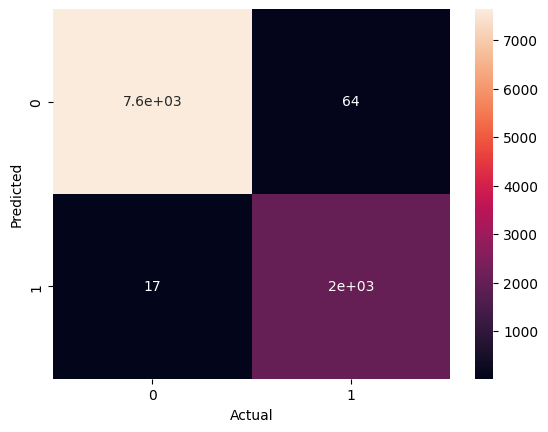

In [48]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y,pred),annot=True)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

C:\Users\Patience\AppData\Local\Temp\ipykernel_29984\3195021007.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y,hist=False,label='Actual', color='r')
C:\Users\Patience\AppData\Local\Temp\ipykernel_29984\3195021007.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p

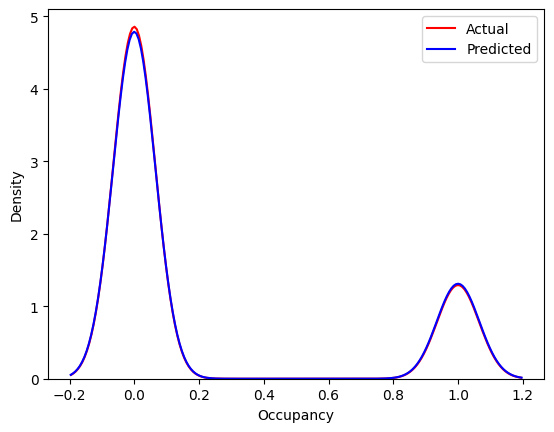

In [49]:
#distribution plot for the predicted and actual values
ax = sns.distplot(y,hist=False,label='Actual', color='r')
sns.distplot(pred,hist=False,label='Predicted',color='b',ax=ax)
plt.legend()
plt.show()

In [50]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



In [51]:
print('Accuracy Score : ' + str(accuracy_score(y,pred)))
print('Precision Score : ' + str(precision_score(y,pred)))
print('Recall Score : ' + str(recall_score(y,pred)))
print('F1 Score : ' + str(f1_score(y,pred)))

Accuracy Score : 0.9916940114848236
Precision Score : 0.9694656488549618
Recall Score : 0.9917032698877501
F1 Score : 0.9804583835946924


## Conclusion

From the above models we can see that the Random Forest Classifier has the highest accuracy score of 98%. Therefore we will be using the Random Forest Classifier for our final model.
I also conclude that from the exploratory data analysis, it was found that the change in room temperature, CO levels and light intensity can be used to predict the occupancy of the room, inplace of humidity and humidity ratio.